#  BMW i3 Synchronous Reluctance Motor Design

In [1]:
import math

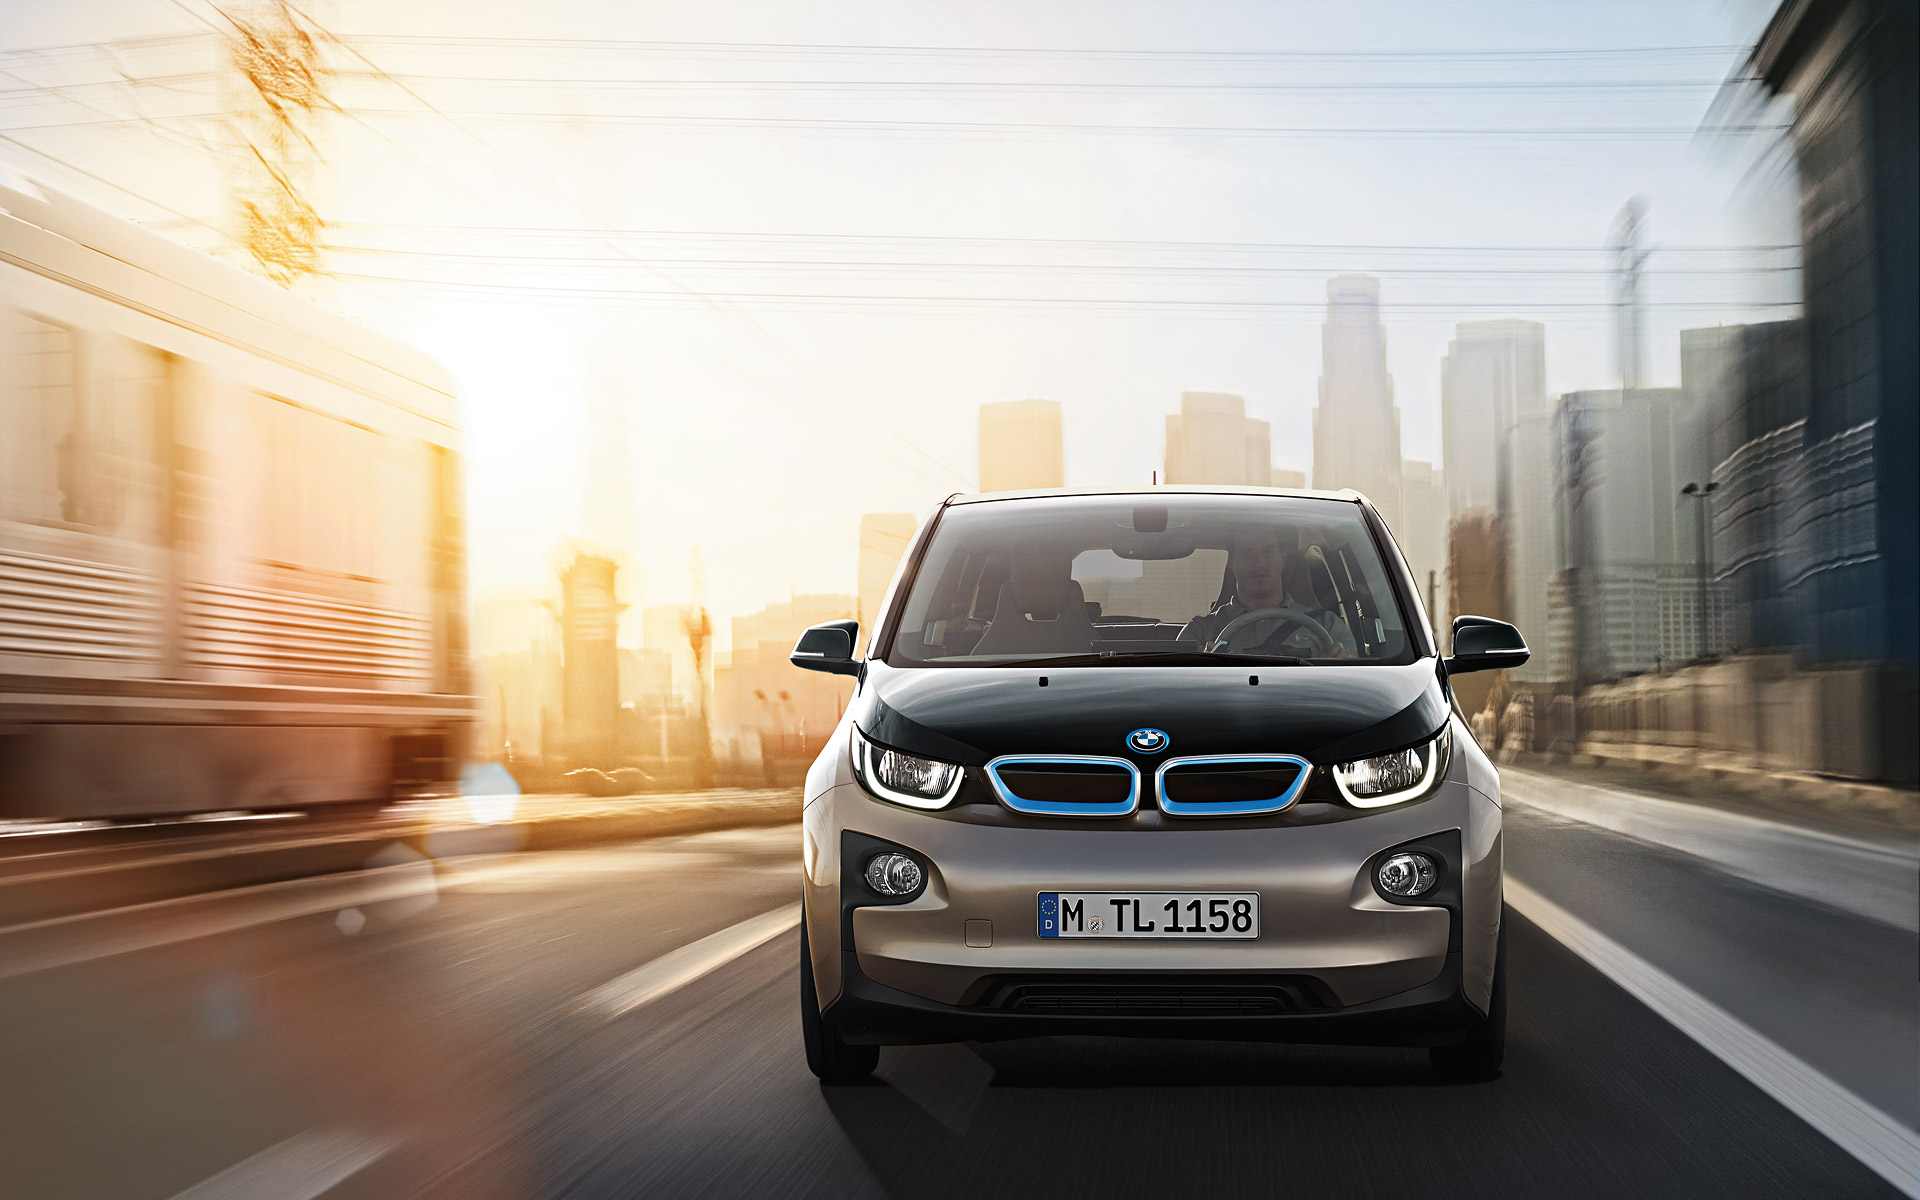

In [2]:
from IPython.display import Image
Image(filename='bmwi3.jpg')

In [3]:
V_supply=400 # V
Rated_power=75000 # Watts
Trated=250 # Nm

In [4]:
p=6 #6 pole number
pp=p/2 #pole pairs

In [5]:
Vfund=(V_supply/2)*(4/math.pi) #Fundamental phase voltage
Vrms=Vfund*math.sqrt(3)/math.sqrt(2) #Rms line voltage
print ('Line voltage is', round(Vrms),'V')

Line voltage is 312 V


In [6]:
Vphase_peak=V_supply/math.sqrt(3)
Vline=Vphase_peak*math.sqrt(3)/math.sqrt(2) #Rms line voltage
Vphase=Vphase_peak/math.sqrt(2) #Rms phase voltage

In [7]:
Vline

282.84271247461896

In [8]:
Vphase

163.29931618554522

In [9]:
eff=0.90 # efficiency
pf=0.90 #Power factor

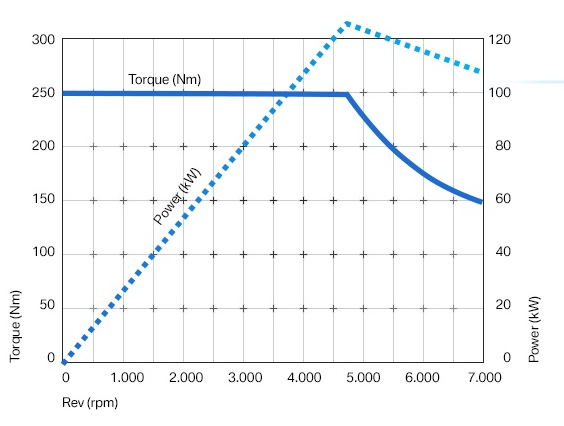

In [10]:
from IPython.display import Image
Image(filename='tork.png')

In [11]:
Imax=Rated_power/(math.sqrt(3)*Vline*eff*pf)
Imax

189.00383817771439

In [12]:
pp=3 #Pole pair
p=6 #Pole number
m=3 #Phase number

In [13]:
n_max=9000 #rpm
fmax=n_max*p/120 #Max frequency 
fmax

450.0

In [14]:
Max_spd=150 # km/h
Rtd_speed=80 #  km/h
f=fmax/Max_spd*Rtd_speed #Nominal frequency
f #Nominal frequency

240.0

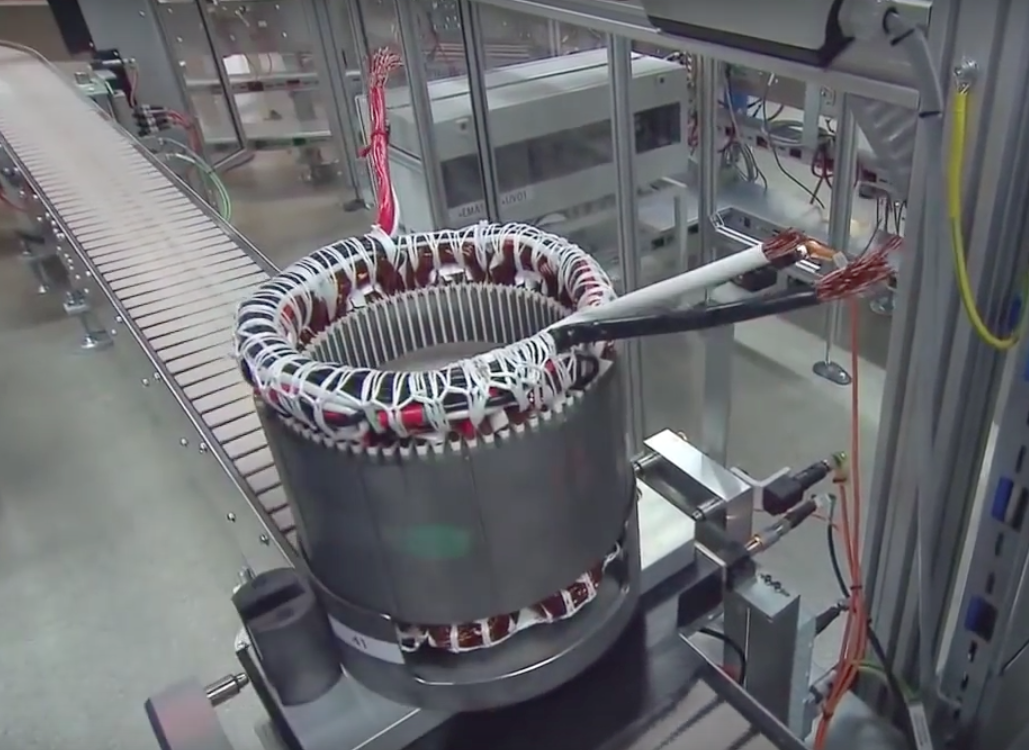

In [15]:
from IPython.display import Image
Image(filename='motori3.png')

In [16]:
KE=0.98-0.005*pp
Sgap=KE*Rated_power/(eff*pf)

In [17]:
print ('KE =',KE)
print ('Sgap =',round(Sgap,1))

KE = 0.965
Sgap = 89351.9


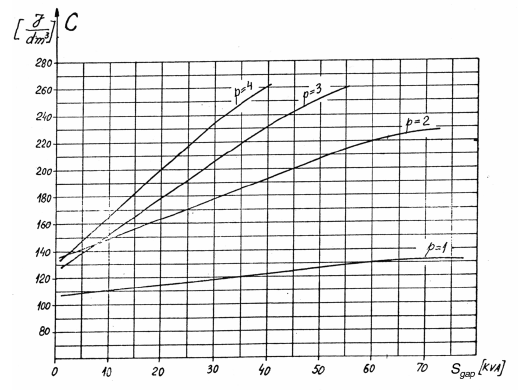

In [18]:
from IPython.display import Image
Image(filename='essons.png')

In [19]:
C0=280e3 #Esson's constant 
lambda1=1.6 #Stack aspect ratio
Dis=math.pow((2*pp*pp*Sgap)/(math.pi*lambda1*f*C0),1/3) #Stator bore diameter in m
print ('Dis =', round(Dis,4)*100, 'cm')

Dis = 16.82 cm


In [20]:
τ=math.pi*Dis/(2*pp) #Pole pitch in m
L=lambda1*τ #Stack length in m

In [21]:
τ # m

0.08808682038846251

In [22]:
L # m

0.14093891262154

In [23]:
q=4
τ_s=τ/(m*q) #Slot pitch 

In [24]:
τ_s #m

0.007340568365705209

In [25]:
KD=0.68 #Dis/Dout
Dout=Dis/KD #Stator outer diameter in m
print ('Dout =', round(Dout,2)*100, 'cm')

Dout = 25.0 cm


In [26]:
g=(0.1+0.012*math.pow(Rated_power,1/3))*1e-3 #Air gap length , m 
g*1000 #mm

0.6060595991810493

In [27]:
Ns=p*q*m # stator slots
Ns

72

In [28]:
α_ec=2*math.pi*pp/Ns # radian
print ('α_ec =', round(α_ec,2),'radian')

α_ec = 0.26 radian


In [29]:
Kq1=math.sin(q*α_ec/2)/(q*math.sin(α_ec/2)) #Distribution factor
Ky1=math.sin(math.pi/2*10/12) #Pitch factor
Kw1=Kq1*Ky1 #Winding factor
Kw1

0.9250306488875357

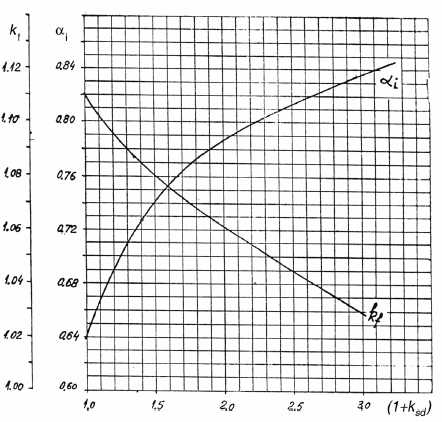

In [30]:
from IPython.display import Image
Image(filename='form.png')

In [31]:
Bg=0.65 #Air gap flux density 
Kf=1.05 #Form factor
α_i=0.726 #Pole spanning coefficient
phi=α_i*τ*L*Bg #Pole flux in Wb
phi

0.005858572755759733

In [32]:
W1=KE*Vphase/(4*Kf*Kw1*f*phi) #Number of turns per phase
print ('W1 =',round(W1,2),'turns/phase')

W1 = 28.85 turns/phase


In [33]:
a1=2 #Number of current paths in parallel for low voltage IMs with power rating above 100kW
ns=a1*W1/(pp*q) #Number of conductors per slot
print ('ns =',round(ns,2),'conductors')

ns = 4.81 conductors


In [34]:
ns=4
w1_ex=W1
W1=pp*q*ns/a1 # number of turns per phase
Bg=Bg*w1_ex/W1 # air gap flux density
print ('W1 =',W1,'turns/phase')
print ('Bg =',round(Bg,3),'T')

W1 = 24.0 turns/phase
Bg = 0.781 T


In [35]:
Iln=Imax #Rated current
Jcus=20 #Initial current density in A/mm^2 for liquid cooled motors
Acu=Iln/(Jcus*a1) #Magnetic wire cross section in mm^2
rcu=math.sqrt(Acu/math.pi) #Wire radianius in mm
dcu=2*rcu #Wire diameter in mm
print ('Acu =',round(Acu,2),'mm^2')
print ('rcu =',round(rcu,2),'mm')
print ('dcu =',round(dcu,2),'mm')

Acu = 4.73 mm^2
rcu = 1.23 mm
dcu = 2.45 mm


In [36]:
ap=2

In [37]:
Skin_depth=6.62/math.sqrt(f) #Skin depth in cm
print ('Skin_depth =',round(Skin_depth,2)*10,'mm')
Dw=2*Skin_depth #Wire diameter in cm
print ('Dw =',round(Dw,2)*10,'mm')

Skin_depth = 4.3 mm
Dw = 8.5 mm


In [38]:
q_l=m*2*W1*Iln/(math.pi*Dis*L) #Electric Loading 
B_l=phi/(math.pi*Dis*L/(2*pp)) #Magnetic Loading 

In [39]:
print ('q_l =',round(q_l,2),'A/m^2')
print ('B_l =',round(B_l,2),'T')

q_l = 365376.0 A/m^2
B_l = 0.47 T


In [40]:
fill_factor=0.44 #Fill factor for round wire
Asu=math.pi*dcu*dcu*ap*ns/(4*fill_factor) #Useful slot area in mm^2
print ('Asu =',round(Asu,2),'mm^2')

Asu = 85.91 mm^2


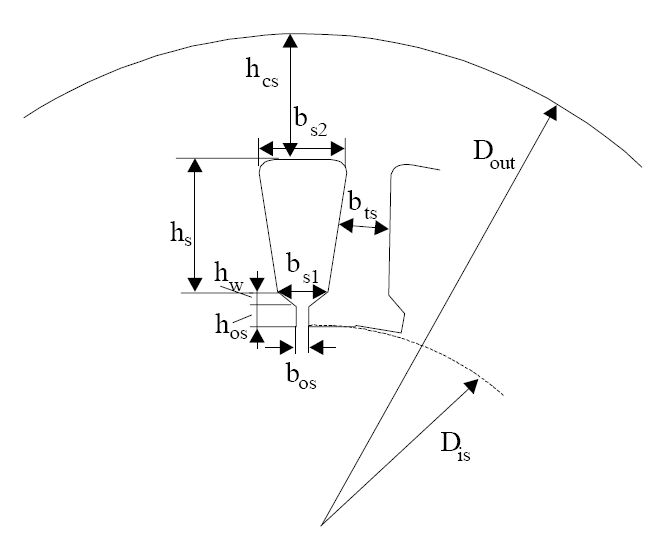

In [41]:
from IPython.display import Image
Image(filename='geometry.png')

In [42]:
Kfe=0.96 #For 0.35-0.5 mm thick lamination
Bts=1.6 #Tooth flux density in T
bts=Bg*τ_s/(Bts*Kfe) #Tooth width in m
print ('bts =',round(bts,4)*1000,'mm')

bts = 3.7 mm


In [43]:
bos=2.3e-3
hos=1.1e-3
hw=1.4e-3
bs1=math.pi*(Dis+2*hos+2*hw)/Ns-bts #lower slot width
bs2=math.sqrt(4*Asu*1e-6*math.tan(math.pi/Ns)+bs1*bs1) #Upper slot width in m
hs=2*Asu*1e-6/(bs1+bs2) #Slot useful height in m
print ('bs1 =',round(bs1,5)*1000,'mm','bs2 =',round(bs2,2)*1000,'mm','hs =',round(hs,5)*1000,'mm')


bs1 = 3.82 mm bs2 = 10.0 mm hs = 18.54 mm


In [44]:
u0=4*math.pi*1e-7 #Permeability of free space
Fmg=1.2*g*Bg/u0 #Air gap mmf
Hts=3880  #Magnetic field intensity for Bts=1.6 T in A/m
Fmts=Hts*(hs+hos+hw) #Stator tooth mmf
Kst=1.4-1 #Teeth saturation factor
Fmtr=Kst*Fmg-Fmts #Rotor tooth mmf
print ('Fmg =',round(Fmg,2),'Aturns','Fmts =',round(Fmts,2),'Aturns','Fmtr =',round(Fmtr,2),'Aturns')

Fmg = 452.16 Aturns Fmts = 81.63 Aturns Fmtr = 99.24 Aturns


In [45]:
hcs=(Dout-(Dis+2*(hos+hw+hs)))/2 #Stator back iron height in m
print ('hcs =',round(hcs,4)*1000,'mm')

hcs = 18.5 mm


In [46]:
Bcs=phi/(2*L*hcs) #Back core flux density in T
print ('Bcs =',round(Bcs,2),'T')

Bcs = 1.12 T


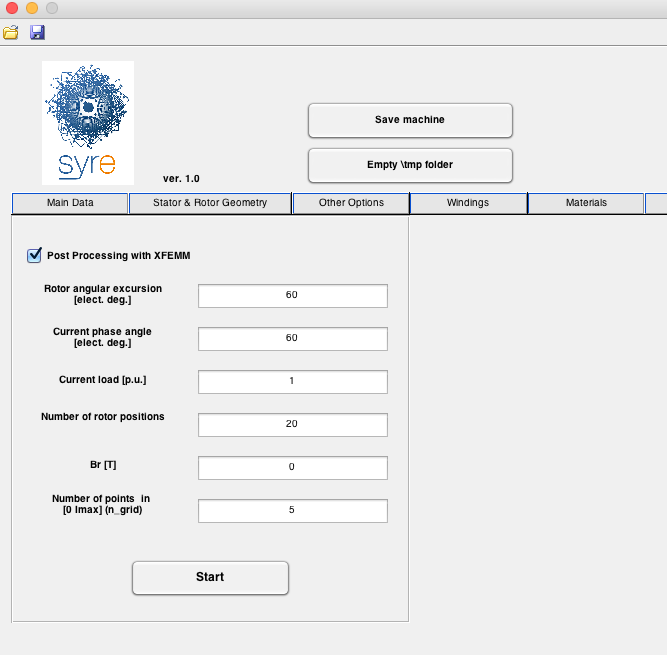

In [47]:
from IPython.display import Image
Image(filename='1.png')

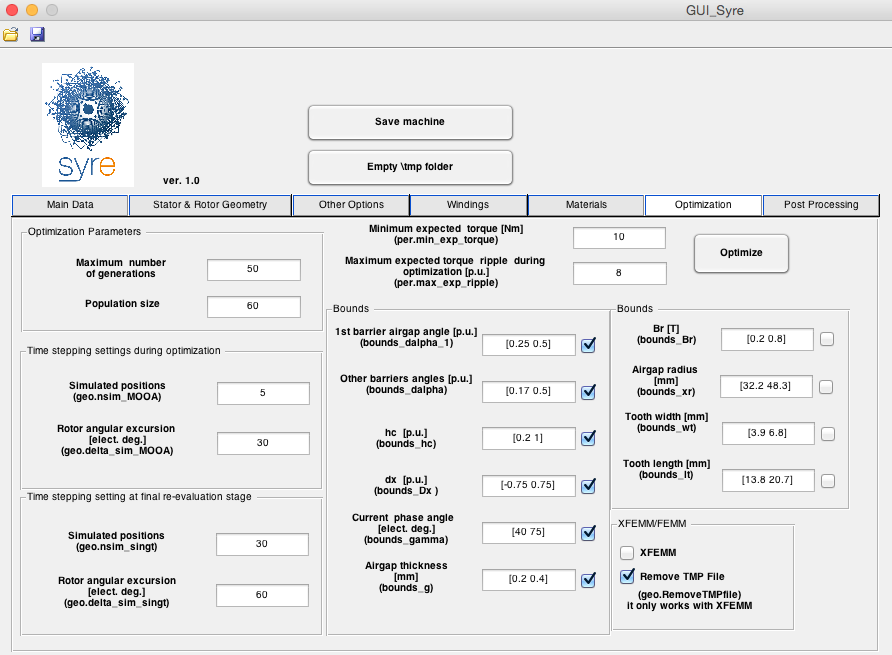

In [48]:
from IPython.display import Image
Image(filename='2.png')

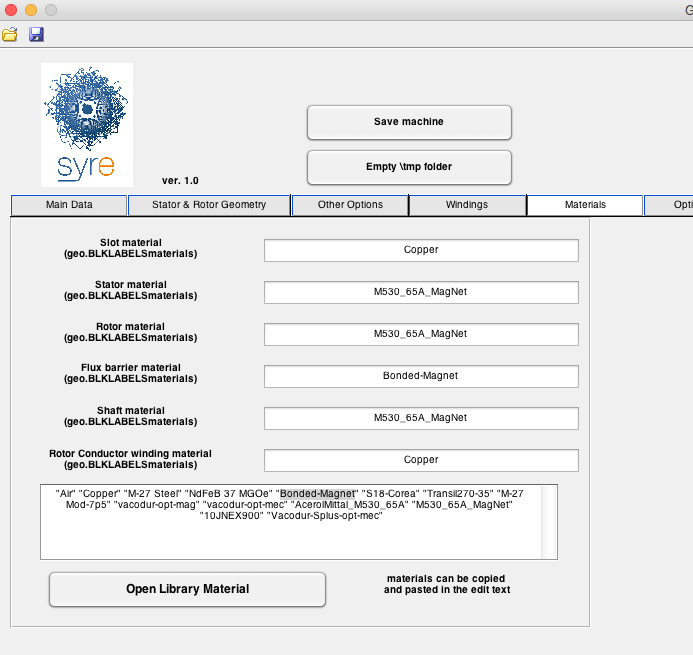

In [49]:
from IPython.display import Image
Image(filename='3.png')

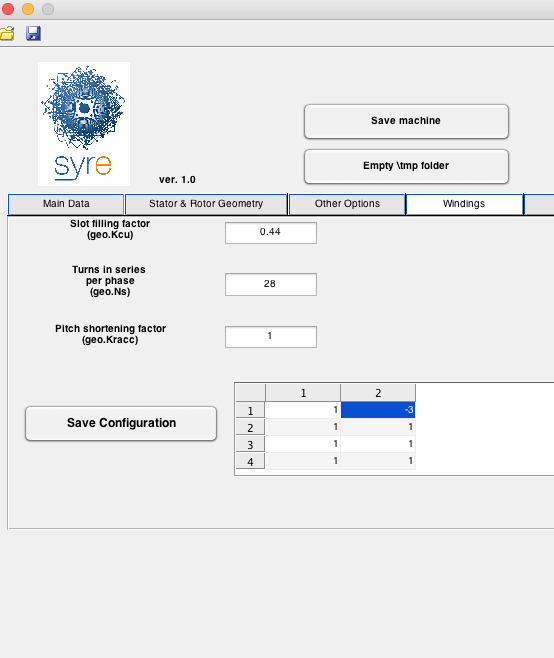

In [50]:
from IPython.display import Image
Image(filename='4.png')

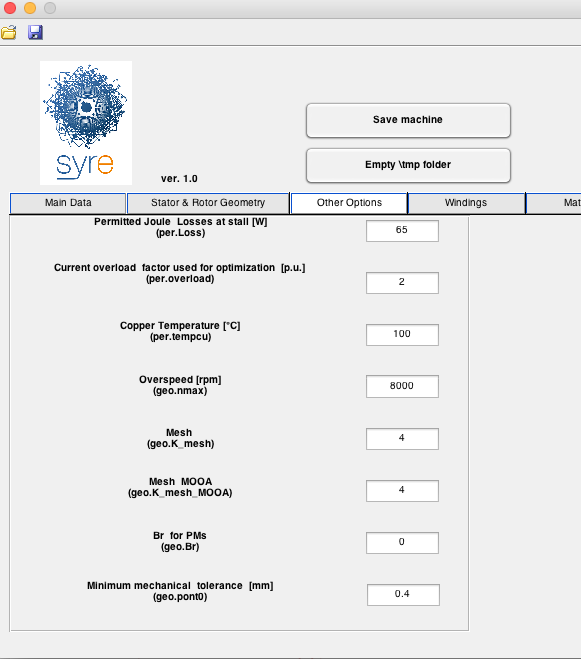

In [51]:
from IPython.display import Image
Image(filename='5.png')

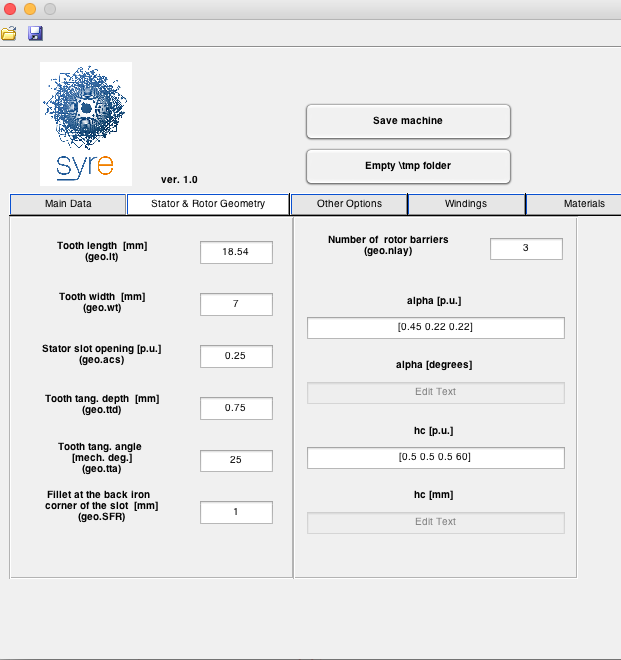

In [52]:
from IPython.display import Image
Image(filename='6.png')

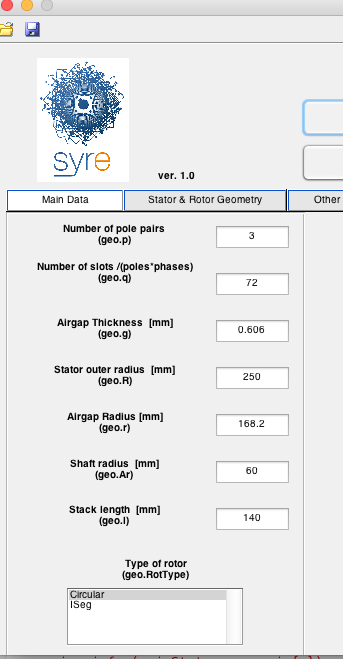

In [53]:
from IPython.display import Image
Image(filename='7.png')

Syre programına girdiğim değerler böyle olmasına rağmen herhangi bir çıktı alamadım,yarın windows bir bilgisayarda kurulu matlab ile aynı değerleri deneyip yükleyeceğim